<a href="https://colab.research.google.com/github/comparativechrono/GMO7-Jupyter/blob/main/R_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's use R to do our assignment!

In [5]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(tidyverse)

In [8]:
x <- read_tsv("assignment_data.tsv")

Rows: 148 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): Phenotype, Sex_chromosomes, rs139052738, rs886040801
dbl (2): Expression BMX, Expression BRCA2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [20]:
head(x)

Phenotype,Sex_chromosomes,rs139052738,rs886040801,Expression BMX,Expression BRCA2
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
unaffected,XX,C/T,T/T,317,497.0
unaffected,XY,T,G/T,333,252.0
unaffected,XX,C/T,G/T,300,274.5
unaffected,XY,T,G/T,334,283.0
unaffected,XX,C/C,T/T,379,412.0
unaffected,XX,C/T,G/T,391,237.0


In [10]:
x$rs886040801[x$rs886040801 == "T/G"]<-"G/T"

In [11]:
my_table <- table(x$Phenotype, x$rs886040801)

In [12]:
my_table

                 
                  G/G G/T T/T
  familial cancer  32   1   0
  unaffected        2  73  40

In [13]:
chisq.test(my_table)


	Pearson's Chi-squared test

data:  my_table
X-squared = 131.44, df = 2, p-value < 2.2e-16


In [14]:
shapiro.test(x$`Expression BRCA2`)


	Shapiro-Wilk normality test

data:  x$`Expression BRCA2`
W = 0.91484, p-value = 1.172e-07


In [15]:
kruskal.test(`Expression BRCA2` ~ rs886040801, x)


	Kruskal-Wallis rank sum test

data:  Expression BRCA2 by rs886040801
Kruskal-Wallis chi-squared = 123.95, df = 2, p-value < 2.2e-16


In [17]:
cor.test(x$`Expression BRCA2`, x$`Expression BMX`, method = "spearman")

Warning message in cor.test.default(x$`Expression BRCA2`, x$`Expression BMX`, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  x$`Expression BRCA2` and x$`Expression BMX`
S = 535112, p-value = 0.9083
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.009553677 


In [22]:
x$Phenotype <- factor(x$Phenotype)
x$Sex_chromosomes <- factor(x$Sex_chromosomes)
x$rs886040801 <- factor(x$rs886040801)
x$rs139052738 <- factor(x$rs139052738)


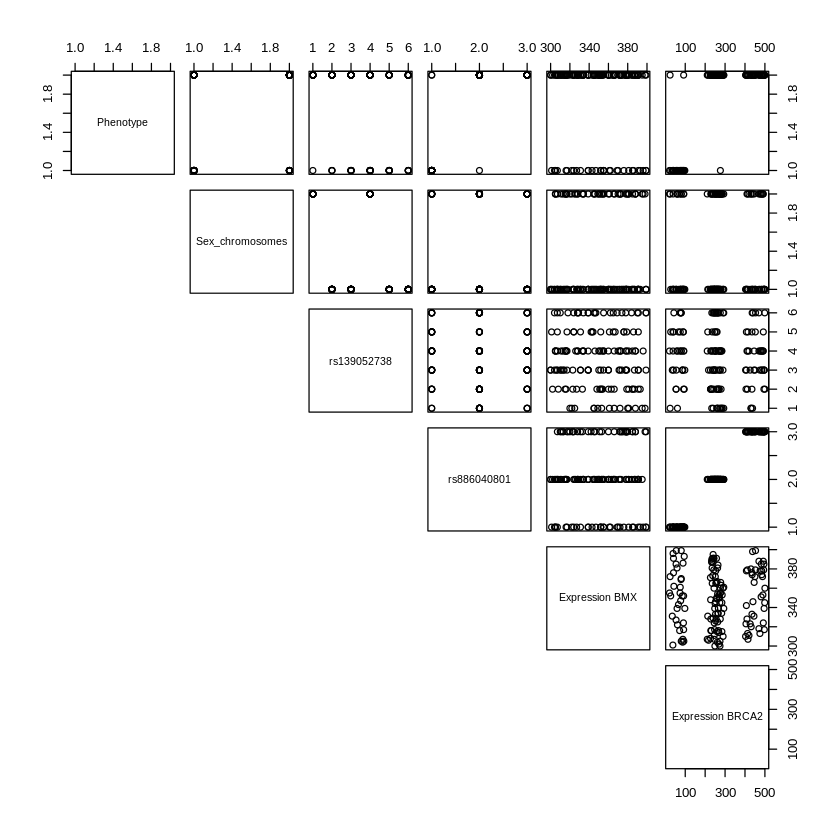

In [23]:
pairs(x, lower.panel = NULL)

In [24]:
levels(x$rs139052738)

[1] "C"   "C/C" "C/T" "T"   "T/C" "T/T"

In [25]:
install.packages("caTools")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [26]:
library(caTools)
library(e1071)

In [27]:
disease_data <- x

In [28]:
split_size = 0.8

sample_size = floor(split_size * nrow(disease_data))

set.seed(123)
train_indices <- sample(seq_len(nrow(disease_data)), size = sample_size)

train <- disease_data[train_indices, ]
test <- disease_data[-train_indices, ]

In [29]:
install.packages("party")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’




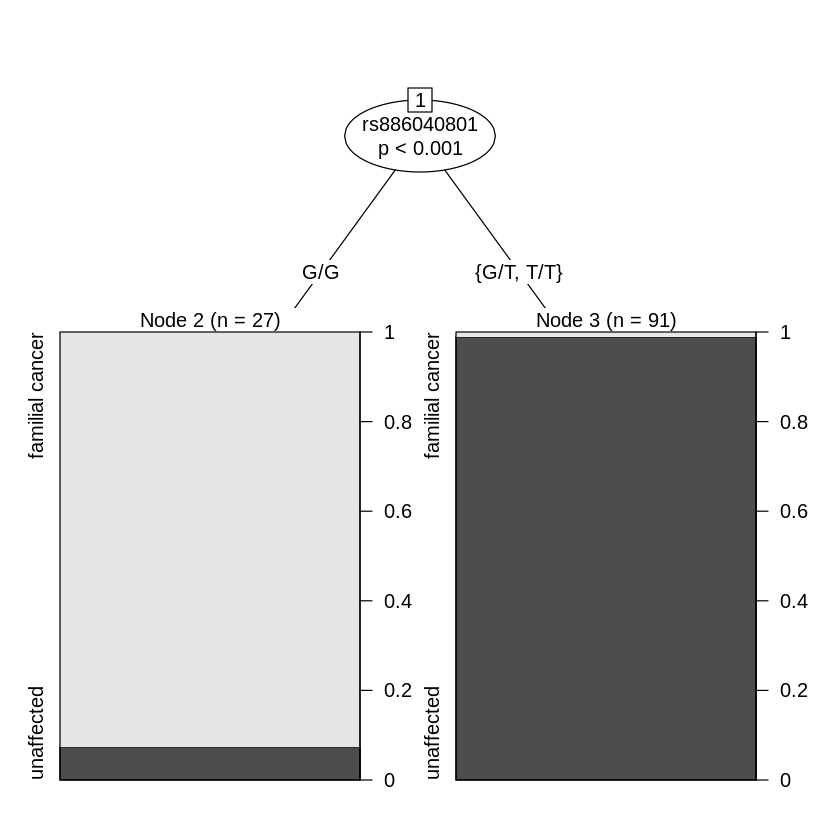

In [31]:
library(party)
tree.train <- ctree(Phenotype ~ ., data = train)
plot(tree.train)

In [32]:
test$Phenotype.tree <- predict(tree.train, test)

In [36]:
tail(test)

Phenotype,Sex_chromosomes,rs139052738,rs886040801,Expression BMX,Expression BRCA2,Phenotype.tree
<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
unaffected,XX,T/T,T/T,346,440.0,unaffected
unaffected,XY,C,G/T,366,278.0,unaffected
unaffected,XX,T/T,G/T,339,266.5,unaffected
unaffected,XX,C/C,T/T,385,495.0,unaffected
unaffected,XY,C,G/T,325,263.0,unaffected
unaffected,XX,C/T,T/T,331,445.0,unaffected
